So this exercise is designed to see if there's a linear relationship between low and high temperature, and if we can use linear regression to predict the high temp based on the low.

In [3]:
import pandas as pd
import numpy as np
# Setting random seed for reproducibility, not sure if I'll need it.
np.random.seed(1000)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [37]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [15]:
#Read the data
df1=pd.read_csv("E:\Python_Data\WW2_data\Weather_Summary.csv")

In [16]:
df1.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [25]:
to_drop=['WTE','RVG','RHN','RHX','SD3','TSHDSBRSGF','PGT','ITH','FTI','FB','FT','SND','SNF','MEA','MIN','MAX','SPD','DR','PRCP','DA',
         'MO','YR','PoorWeather','Snowfall','MeanTemp','WindGustSpd','Precip','MaxTemp','Date','STA']

In [26]:
df=df1.drop(columns=to_drop, axis=1)
y=df1['MaxTemp']

In [33]:
df1['Date'] =  pd.to_datetime(df1['Date'], infer_datetime_format=True)

In [27]:
df.head()

,MinTemp
0,22.222222
1,21.666667
2,22.222222
3,22.222222
4,21.666667


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df, y)

In [29]:
len(X_test) + len(X_train) == len(df)

True

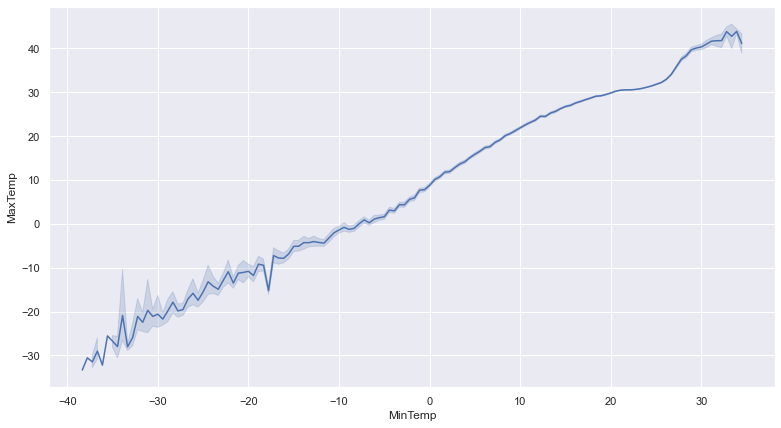

In [40]:
sns.set(rc = {'figure.figsize':(13,7)})
sns.lineplot(data=df1, x="MinTemp", y="MaxTemp")

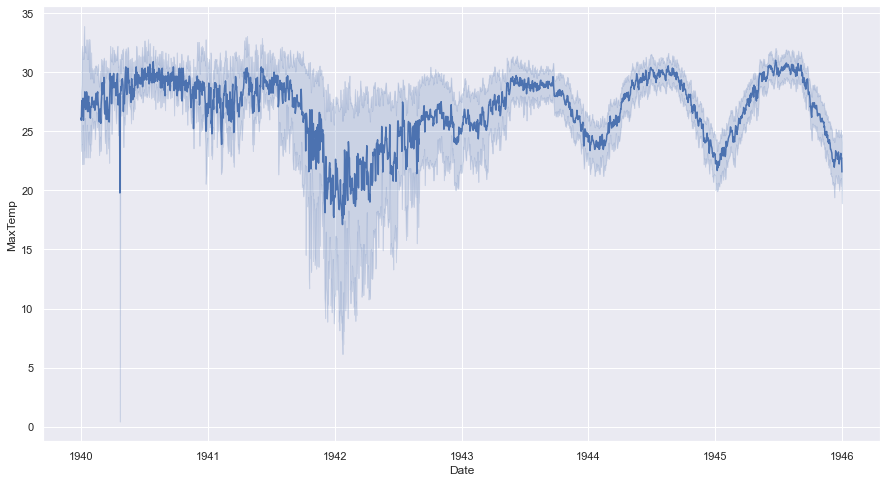

In [39]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=df1, x="Date", y="MaxTemp")